<a href="https://colab.research.google.com/github/ViniitMe/Machine-Learning-foundation-and-Applications/blob/master/15MI33017_FaceRecognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

##Helper functions. Use when needed

In [0]:
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()




# Step1: Dataset Read

In [0]:
#Read dataset. The dataset given is already flattened.
from google.colab import drive
drive.mount('/content/drive/') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data = pd.read_csv("/content/drive/My Drive/15MI33017/face_data.csv")
targets = data["target"]
pixels = data.drop(["target"],1)
print(pixels.head())

print(targets.head())
print(pixels.shape)
print(targets.shape)

          0         1         2  ...      4093      4094      4095
0  0.309917  0.367769  0.417355  ...  0.152893  0.161157  0.157025
1  0.454545  0.471074  0.512397  ...  0.152893  0.152893  0.152893
2  0.318182  0.400826  0.491736  ...  0.140496  0.148760  0.152893
3  0.198347  0.194215  0.194215  ...  0.752066  0.752066  0.739669
4  0.500000  0.545455  0.582645  ...  0.177686  0.173554  0.173554

[5 rows x 4096 columns]
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
(400, 4096)
(400,)


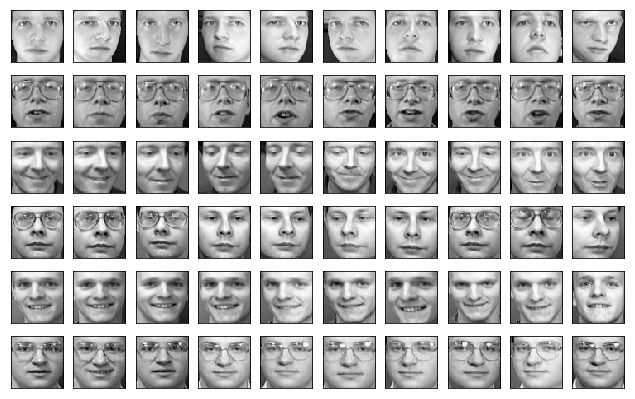

In [0]:
show_orignal_images(pixels)

## Step 2: Split Dataset into training and testing


In [0]:
x_train,x_test,y_train,y_test = train_test_split(pixels, targets, test_size=0.3)
print("x_train: "+str(x_train.shape))
print("y_train: "+str(y_train.shape))
print("x_test: "+str(x_test.shape))
print("y_test: "+str(y_test.shape))
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

x_train: (280, 4096)
y_train: (280,)
x_test: (120, 4096)
y_test: (120,)


In [0]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.367769,0.454545,0.512397,0.582645,0.590909,0.590909,0.590909,0.586777,0.603306,0.607438,0.599174,0.590909,0.590909,0.578512,0.590909,0.607438,0.615702,0.611570,0.615702,0.611570,0.603306,0.607438,0.590909,0.599174,0.607438,0.607438,0.570248,0.561983,0.557851,0.537190,0.524793,0.545455,0.549587,0.566116,0.561983,0.582645,0.578512,0.578512,0.574380,0.566116,...,0.652893,0.636364,0.640496,0.640496,0.632231,0.640496,0.628099,0.615702,0.590909,0.607438,0.615702,0.603306,0.574380,0.570248,0.590909,0.574380,0.537190,0.537190,0.524793,0.512397,0.524793,0.504132,0.479339,0.458678,0.421488,0.433884,0.417355,0.388430,0.388430,0.396694,0.400826,0.396694,0.334711,0.161157,0.152893,0.140496,0.144628,0.152893,0.157025,0.161157
1,0.351240,0.433884,0.553719,0.648760,0.706612,0.752066,0.789256,0.818182,0.818182,0.830578,0.826446,0.826446,0.830578,0.834711,0.834711,0.838843,0.838843,0.834711,0.838843,0.847107,0.847107,0.851240,0.851240,0.851240,0.851240,0.851240,0.851240,0.847107,0.842975,0.847107,0.838843,0.838843,0.838843,0.834711,0.838843,0.838843,0.838843,0.838843,0.838843,0.830578,...,0.834711,0.830578,0.826446,0.826446,0.826446,0.822314,0.822314,0.814050,0.814050,0.826446,0.826446,0.818182,0.805785,0.797521,0.780992,0.772727,0.768595,0.743802,0.698347,0.665289,0.611570,0.545455,0.500000,0.462810,0.429752,0.409091,0.438017,0.487603,0.533058,0.561983,0.561983,0.553719,0.561983,0.545455,0.528926,0.351240,0.115702,0.157025,0.210744,0.206612
2,0.144628,0.123967,0.111570,0.111570,0.123967,0.128099,0.136364,0.123967,0.181818,0.202479,0.206612,0.219008,0.227273,0.219008,0.256198,0.256198,0.268595,0.247934,0.219008,0.227273,0.206612,0.198347,0.173554,0.157025,0.169422,0.161157,0.165289,0.177686,0.206612,0.210744,0.239669,0.256198,0.272727,0.301653,0.322314,0.301653,0.297521,0.301653,0.293388,0.326446,...,0.314050,0.318182,0.326446,0.326446,0.309917,0.314050,0.309917,0.293388,0.289256,0.297521,0.305785,0.326446,0.351240,0.384298,0.404959,0.384298,0.384298,0.376033,0.367769,0.359504,0.363636,0.359504,0.371901,0.367769,0.351240,0.376033,0.347107,0.309917,0.140496,0.297521,0.557851,0.648760,0.553719,0.264463,0.508265,0.611570,0.640496,0.570248,0.516529,0.504132
3,0.202479,0.210744,0.276859,0.388430,0.528926,0.607438,0.611570,0.549587,0.380165,0.181818,0.231405,0.326446,0.392562,0.433884,0.458678,0.471074,0.500000,0.528926,0.549587,0.557851,0.520661,0.433884,0.454545,0.533058,0.566116,0.582645,0.590909,0.582645,0.574380,0.561983,0.557851,0.561983,0.582645,0.623967,0.665289,0.702479,0.735537,0.760331,0.776860,0.793388,...,0.586777,0.595041,0.595041,0.582645,0.586777,0.586777,0.570248,0.553719,0.553719,0.553719,0.524793,0.508265,0.508265,0.504132,0.520661,0.566116,0.574380,0.557851,0.545455,0.545455,0.570248,0.611570,0.607438,0.582645,0.561983,0.561983,0.545455,0.541322,0.508265,0.466942,0.446281,0.450413,0.450413,0.425620,0.396694,0.380165,0.190083,0.185950,0.206612,0.198347
4,0.338843,0.458678,0.681818,0.772727,0.785124,0.814050,0.838843,0.851240,0.847107,0.851240,0.855372,0.855372,0.851240,0.851240,0.847107,0.847107,0.851240,0.847107,0.847107,0.838843,0.834711,0.826446,0.822314,0.822314,0.805785,0.785124,0.768595,0.760331,0.752066,0.735537,0.735537,0.764463,0.760331,0.756198,0.756198,0.756198,0.747934,0.752066,0.739669,0.735537,...,0.466942,0.458678,0.446281,0.425620,0.404959,0.396694,0.376033,0.363636,0.371901,0.371901,0.384298,0.400826,0.392562,0.396694,0.396694,0.425620,0.433884,0.438017,0.438017,0.429752,0.446281,0.450413,0.429752,0.413223,0.396694,0.400826,0.409091,0.417355,0.433884,0.466942,0.487603,0.491736,0.516529,0.516529,0.491736,0.363636,0.107438,0.128099,0.123967,0.140496


## Step 3: Perform PCA.

Extracting the top 150 eigenfaces from 280 faces of training set


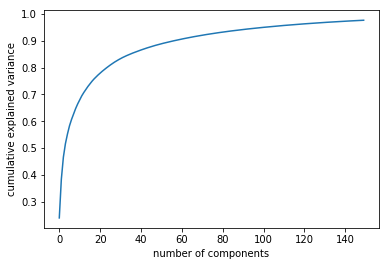

In [0]:
#n_comp= 150. You may use library.
n_components = 150

print("Extracting the top %d eigenfaces from %d faces of training set" % (n_components, x_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

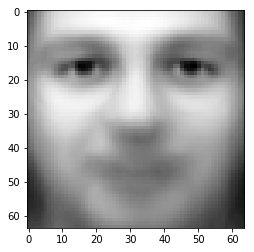

In [0]:
# Mean Face
mean_face = x_train.mean(0)
mean_face.shape
plt.imshow(np.array(mean_face).reshape(64, 64), cmap='gray')
plt.show()

(150, 4096)


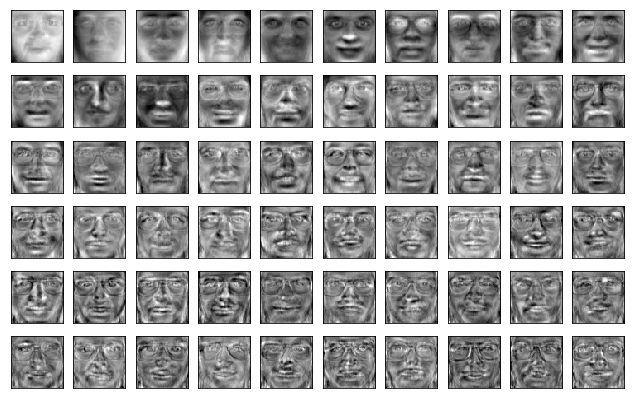

In [0]:
# showing_eigenfaces(pca)
eigenfaces = pca.components_
print(eigenfaces.shape)
show_orignal_images(eigenfaces)

##Step4 : Project Training data to PCA


In [0]:
#Projecting the input data on the eigenfaces orthonormal basis
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(280, 4096)
(120, 4096)


## Step 5: Initialize Classifer and fit training data
# KNN, Decision Tree, Naive Bayes

In [0]:
# KNN
clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(x_train_pca,y_train.ravel())
y_pred_KNN = clf1.predict(x_test_pca)
acc_KNN = accuracy_score(y_test,y_pred_KNN)
print("Accuracy from KNN: "+str(acc_KNN))


# Decision Tree
clf2  = DecisionTreeClassifier(max_depth=500)
clf2.fit(x_train_pca,y_train.ravel())
y_pred_DT = clf2.predict(x_test_pca)
acc_DT = accuracy_score(y_test,y_pred_DT)
print("Accuracy from decision Tree: "+str(acc_DT))


#Naive Bayes
clf3 = GaussianNB()
clf3.fit(x_train_pca,y_train.ravel())
y_pred_NB = clf3.predict(x_test_pca)
acc_NB = accuracy_score(y_test,y_pred_NB)
print("Accuracy from Naive Bayes: "+str(acc_NB))

Accuracy from KNN: 0.49166666666666664
Accuracy from decision Tree: 0.48333333333333334
Accuracy from Naive Bayes: 0.7166666666666667


## Step 6: Perform testing and get classification report


In [0]:
#Predicting people's names on the test set
print(y_pred_KNN)
print(y_pred_DT)
print(y_pred_NB)
print(np.array(y_test))

[ 4 21 29 10 24 29 18  1 23  0  8 32 13 38 26 16 25 22 18 20 21  8 23  4
 20 38 39 37 14 24  4 26  1 14 18  2 17  3 38 21 31 29 27 24  8 37 18 38
 18 15 13 34  8 28 18  3 31 15 17  2  7  2 12  7 11 14 20 16 25 36 17 17
 18 14  6 17 30  3 26 20 38  4 27  3 36  6 22 21 24 11 36 24 14 33 29 36
 32 14 11  4  4 22 29 29  8  9 10 33 38 32 31 19 33 10 24 25 21 20 31  7]
[ 4 23 30 19 24 30 18  1 28  7  8 14 13 38 26 35  2 37 35 20 21 22 20 25
 23 28 39 25 14 24 37 26  1 14 18 36 17  5 32 23 18 33 27 24  9 37 18 38
 20 15 13 34  3 27 16  5 18  0 17  9 38  4  0 11 14 12 26  0 25 36 12  4
  6 12  6 17 28 22 26 28 28 39 19 27 36 10 22 21 25 11  2 17 20 33 30 36
 32 20 11 15  0 14 29 29  8  9 10 33 38 36 16 19 33 10 34 37 21 32 18  7]
[ 4 21 30 10 24 30 18  1 23  0  8 32 13 38 26 16  2 22  6 20 21 22 35  4
 20 28 39 16 14 24 34 26  1 14 18  2 17  9 38 38 31 30 27 24 12 37 18 38
  3 35 13 34 22 28 31  6 34  0 17  9  7  2 39  5 11 12 20 16 25 36 17 17
  6 12  6 17 30  3 12 28 28 39 27  2 36  6  3 38 

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_KNN)

In [0]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [0]:
print(recall)
print(precision)
f1 = (2*recall*precision)/(recall+precision)
print(f1)
print("avg_recall: "+str(recall.mean()))

[0.         1.         1.         0.5        1.         0.5
 0.66666667 1.         0.33333333 1.         1.         0.
 1.         1.         0.33333333 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.6        1.         1.         0.16666667 1.         0.2
 0.8        1.         1.         1.         0.         1.
 1.         1.         0.33333333]
[0.         1.         0.66666667 0.5        0.83333333 1.
 0.66666667 1.         1.         1.         1.         0.
 1.         0.66666667 0.5        0.5        1.         0.57142857
 1.         0.6        1.         0.66666667 0.5        0.66666667
 1.         1.         1.         1.         0.33333333 1.
 1.         1.         1.         1.                nan 1.
 0.5        0.5        1.        ]
[       nan 1.         0.8        0.5        0.90909091 0.66666667
 0.66666667 1.         0.5        1.         1.                nan
 1.         0.8        0.4        0.66666667 1.         0.72727273
 1.

In [0]:
# Cross-Check precision and recall from library function
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       0.50      0.50      0.50         4
           4       0.83      1.00      0.91         5
           6       1.00      0.50      0.67         4
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         5
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         4
          15       0.50      0.33      0.40         3
          16       0.50      1.00      0.67         1
          17       1.00      1.00      1.00         5
          18       0.57    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
